# 练习一：LIF神经元模型仿真

## 原理

LIF模型：
$$
\tau_{m} \frac{du}{dt} = -[u(t)-u_{rest}]+RI(t).
$$
其中$u$为膜电位，$\tau_{m}$为膜时间常数。

首先我们导入brain2和基本的绘图和计算包：

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np

导入本练习使用的LIF模型及相关工具：

In [2]:
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools

## 示例
使用LIF包给出的示例函数，用默认参数仿真。分别给出了正弦和阶跃输入电流下的膜电位曲线和动作电位发放次数：

nr of spikes: 0


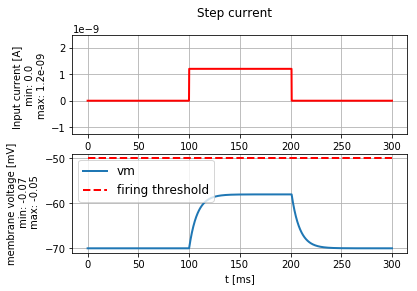

nr of spikes: 5


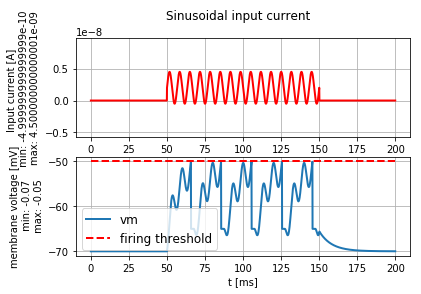

In [3]:
LIF.getting_started()

默认的参数：

In [4]:
LIF.print_default_parameters()

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


## 输入电流为阶跃和正弦

尝试改变电流和神经元的各个参数，进行仿真绘制I和V的图形。

通过阅读程序说明文档和练习文档，可以通过使用simulate_LIF_neuron()自定义仿真参数，调用形式如下：

simulate_LIF_neuron(input_current, simulation_time=5. * msecond, v_rest=-70. * mvolt, v_reset=-65. * mvolt, firing_threshold=-50. * mvolt, membrane_resistance=10. * Mohm, membrane_time_scale=8. * msecond, abs_refractory_period=2. * msecond)

            input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
            simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
            v_rest (Quantity): Resting potential: -70mV
            v_reset (Quantity): Reset voltage after spike - 65mV
            firing_threshold (Quantity) Voltage threshold for spiking -50mV
            membrane_resistance (Quantity): 10Mohm
            membrane_time_scale (Quantity): 8ms
            abs_refractory_period (Quantity): 2ms

其中输入电流使用input_factory.get_sinusoidal_current()等函数定义。

### 阶跃输入电流

定义输入电流，起始终止50-100ms，步长0.1ms，幅值3nV：

In [5]:
step_current = input_factory.get_step_current(
    t_start=500, t_end=1000, unit_time=0.1*b2.ms,
    amplitude= 3 * b2.namp)

仿真神经元，总时间200ms，静息电位-70mV，恢复电位-65mV，阈值-50mV,膜电阻10Mohm：

In [6]:
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(step_current, 
    200*b2.ms, -70*b2.mV, -65*b2.mV, -50*b2.mV, 
    10*b2.Mohm, 8*b2.ms, 2*b2.ms)

画出电流和电压随时间变化的图形,给出发放次数：

nr of spikes: 5


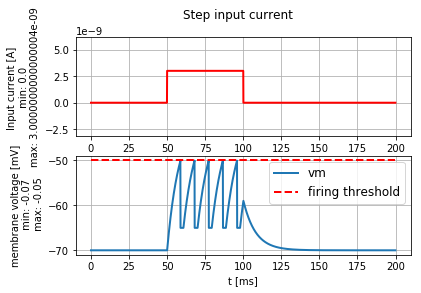

In [7]:
plot_tools.plot_voltage_and_current_traces(
    state_monitor, step_current, title="Step input current",
    firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))

可以看到相比示例中1.2nV的电流，其他参数不变的情况下使用3nV的电流引起了动作电位的发放。

### 正弦输入电流

与阶跃情况完全相同，定义输入电流，起始终止50-100ms，步长0.1ms，峰峰值2.5nV，频率50Hz，直流偏置2nV：

In [8]:
sinusoidal_current = input_factory.get_sinusoidal_current(
        500, 1500, unit_time=0.1 * b2.ms,
        amplitude=2.5 * b2.namp, frequency=50 * b2.Hz, direct_current=2. * b2.namp)

使用与之前相同的神经元参数（这里直接使用缺省的参数），画出图形，给出动作电位发放次数：

nr of spikes: 5


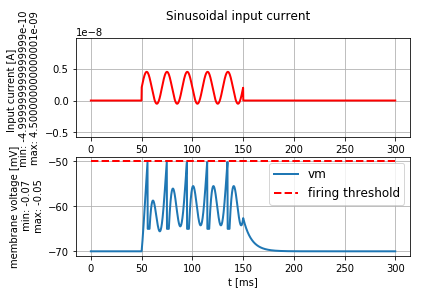

In [9]:
(state_monitor1, spike_monitor1) = LIF.simulate_LIF_neuron(
    input_current=sinusoidal_current, simulation_time=300 * b2.ms)
plot_tools.plot_voltage_and_current_traces(
    state_monitor1, sinusoidal_current, title="Sinusoidal input current", 
    firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor1.count[0]))

### 其他输入电流

之前两小节使用的输入电流是由input_factory中提供的，有几种函数可供选择：ramp，sinusoidal，step，spikes，zero。该函数返回数据形式：

In [10]:
type(sinusoidal_current)

brian2.input.timedarray.TimedArray

可以看到仿真是使用的输入电流是brian2包中定义的TimedArray数据，并非numpy数组或其他形式，而我并没有发现进行自定义的接口，所以想用该工具包仿真自定义的输入电流有些困难。

下面给出使用ramp输入电流发放5个以上动作电位的仿真结果：

In [11]:
ramp_current = input_factory.get_ramp_current(
    t_start=500, t_end=2000, unit_time=0.1 * b2.ms, 
    amplitude_start=2 * b2.namp, amplitude_end=4 * b2.namp, append_zero=True)

nr of spikes: 15


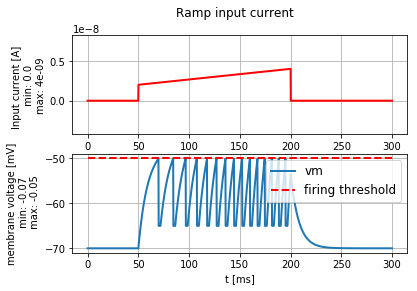

In [12]:
(state_monitor2, spike_monitor2) = LIF.simulate_LIF_neuron(
        input_current=ramp_current, simulation_time=300 * b2.ms)
plot_tools.plot_voltage_and_current_traces(
        state_monitor2, ramp_current, title="Ramp input current", 
        firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor2.count[0]))

# 练习二：LIF神经网络仿真

导入本练习需要的包：

In [13]:
from neurodynex.brunel_model import LIF_spiking_network

设置monitored_subset_size=100，N_highlighted_spiketrains=3，仿真100ms：

INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214974ebeb8>)

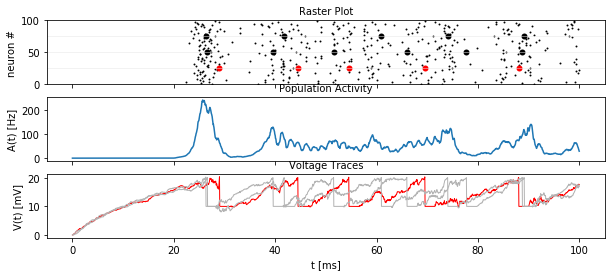

In [14]:
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(
    sim_time=100. * b2.ms, monitored_subset_size=100)
plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor, 
    spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms,
    N_highlighted_spiketrains=3)

设置仿真时间为500ms，设置N_Excit=400，N_Inhib=400，即400个兴奋性神经元和400个抑制性神经元，进行仿真。由于缺省参数下抑制性神经元的个数为兴奋性的1/4，这里增多了抑制性神经元的个数，减小了A(t)的幅值。可以看到A(t)未超过150Hz：

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21498514748>)

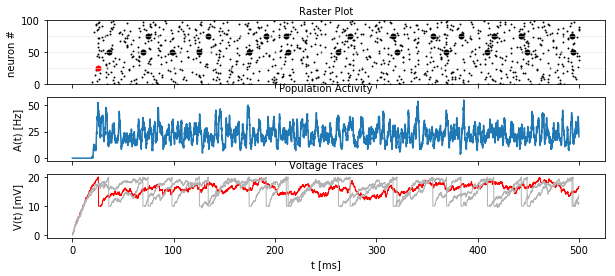

In [15]:
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(
    N_Excit=400, N_Inhib=400,
    sim_time=500. * b2.ms,)
plot_tools.plot_network_activity(
    rate_monitor, spike_monitor, voltage_monitor, 
    spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)

# 练习三：赫布学习(Oja's rule)

导入本练习需要的包

In [16]:
import neurodynex.ojas_rule.oja as oja

生成突触前数据1000个，结果为一个1000乘2的数组：

In [17]:
cloud = oja.make_cloud(n=1000)
cloud.shape

(1000, 2)

计算权重更新：

In [18]:
wcourse = oja.learn(cloud)

画出权重更新过程的两条曲线，并给出最终权重的值：

最终权重值: (-0.6985732653088602,-0.7170747318010586)


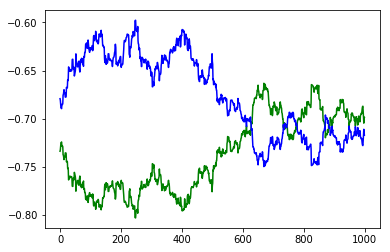

In [19]:
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("最终权重值: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

画出更新的轨迹：

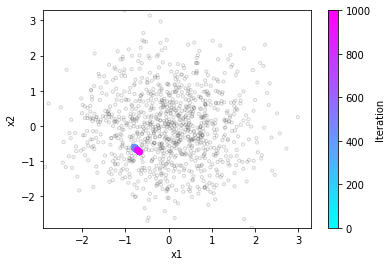

In [20]:
oja.plot_oja_trace(cloud, wcourse)

由于只给定了数据的个数，其他缺省的参数和突触前数据的生成是随机的，所以每次运行结果不会相同，差别可能较大。

在oja包中的learn函数中有一下代码：

In [21]:
#w = np.array([np.cos(radangle), np.sin(radangle)])
#wcourse = np.zeros((len(cloud), 2), float)
#for i in range(0, len(cloud)):
#    wcourse[i] = w
#    y = np.dot(w, cloud[i])
#    w = w + eta * y * (cloud[i] - y * w)

其功能为根据oja's rule计算权重更新的过程。其中w为初始的权重，有两个数据，根据给定的角度radangle计算出。wcourse记录权重更新的过程，对应每一时刻两个权重的值，长度由我们给定的前突触数据cloud决定。for循环对每一时刻计算更新后的w并放入wcourse记录。

根据Oja's rule:
$$
\frac{d\omega_{ij}}{dt}=\gamma[\nu_i\nu_j-\omega_{ij}\nu_i^2]
$$
可以得出每次更新：$\gamma\nu_i[\nu_j-\omega_{ij}\nu_i]$。其中$\gamma$对应代码中的eta，$\nu_i$对应y，$\nu_j$对应cloud[i]，$\omega_{ij}$对应w。y的计算是w和cloud[i]做内积，相当于突触前的两个输入乘以相应权重在求和，且突触后神经元为线性激活函数，于是直接得到输出。